In [13]:
#install.packages("naivebayes")

Installing package into 'C:/Users/sophi/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'naivebayes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sophi\AppData\Local\Temp\RtmpcdRWDG\downloaded_packages


### libraries

In [14]:
library(dplyr)
library(ggplot2)
library(naivebayes)
theme_set(theme_bw(base_size = 16))

Warning message:
"package 'naivebayes' was built under R version 4.2.3"
naivebayes 0.9.7 loaded



### load data

Training:

In [16]:
df_train <- read.csv('NB_train.csv', header=TRUE)
df_train <- df_train[2:8]

df_train$Preferred <- factor(df_train$Preferred)
df_train$trackKey <- factor(df_train$trackKey)
df_train$trackMode <- factor(df_train$trackMode)
df_train$d_artistPop <- factor(df_train$d_artistPop)
df_train$d_trackPop <- factor(df_train$d_trackPop)
df_train$d_year_sim <- factor(df_train$d_year_sim)
df_train$d_pref_dist <- factor(df_train$d_pref_dist)

head(df_train)

,d_artistPop,d_trackPop,trackKey,trackMode,d_year_sim,d_pref_dist,Preferred
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,0,2,1,0,3,1
2,4,5,0,0,2,2,1
3,7,2,2,1,1,2,0
4,4,1,1,1,3,2,1
5,4,1,7,1,0,2,1
6,9,6,5,1,1,2,1


In [7]:
table(df_train$Preferred)


     0      1 
386474 386304 

Testing:

In [17]:
df_test <- read.csv('NB_test.csv', header=TRUE)
df_test <- df_test[2:8]

df_test$Preferred <- factor(df_test$Preferred)
df_test$trackKey <- factor(df_test$trackKey)
df_test$trackMode <- factor(df_test$trackMode)
df_test$d_artistPop <- factor(df_test$d_artistPop)
df_test$d_trackPop <- factor(df_test$d_trackPop)
df_test$d_year_sim <- factor(df_test$d_year_sim)
df_test$d_pref_dist <- factor(df_test$d_pref_dist)

head(df_test)

,d_artistPop,d_trackPop,trackKey,trackMode,d_year_sim,d_pref_dist,Preferred
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,4,1,6,1,1,2,0
2,6,4,7,1,0,2,1
3,4,0,9,0,0,2,1
4,7,6,4,0,2,2,0
5,6,4,0,1,2,2,1
6,7,3,0,1,0,2,0


### naive bayes

In [18]:
NBmodel <- naive_bayes(df_train$Preferred ~., data=df_train)
print(NBmodel)


================================== Naive Bayes ================================== 
 
 Call: 
naive_bayes.formula(formula = df_train$Preferred ~ ., data = df_train)

--------------------------------------------------------------------------------- 
 
Laplace smoothing: 0

--------------------------------------------------------------------------------- 
 
 A priori probabilities: 

      0       1 
0.50011 0.49989 

--------------------------------------------------------------------------------- 
 
 Tables: 

--------------------------------------------------------------------------------- 
 ::: d_artistPop (Categorical) 
--------------------------------------------------------------------------------- 
           
d_artistPop            0            1
         0  0.0148548156 0.0169244947
         1  0.0142312290 0.0166242131
         2  0.0354538727 0.0381202369
         3  0.0772057111 0.0814358640
         4  0.1426383146 0.1448962475
         5  0.1979175831 0.1987450298
        

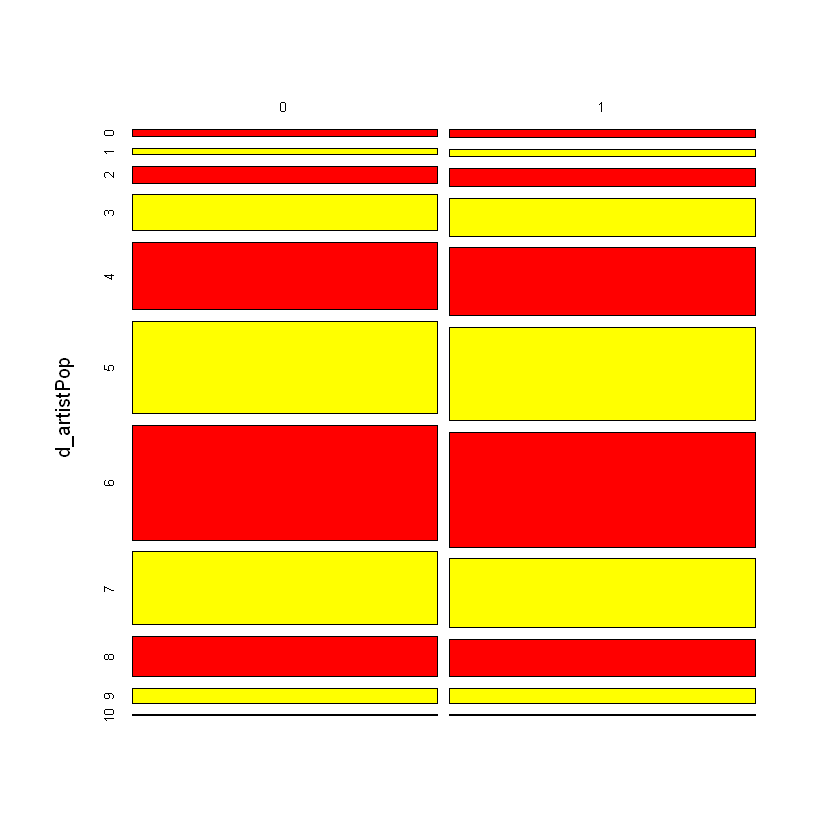

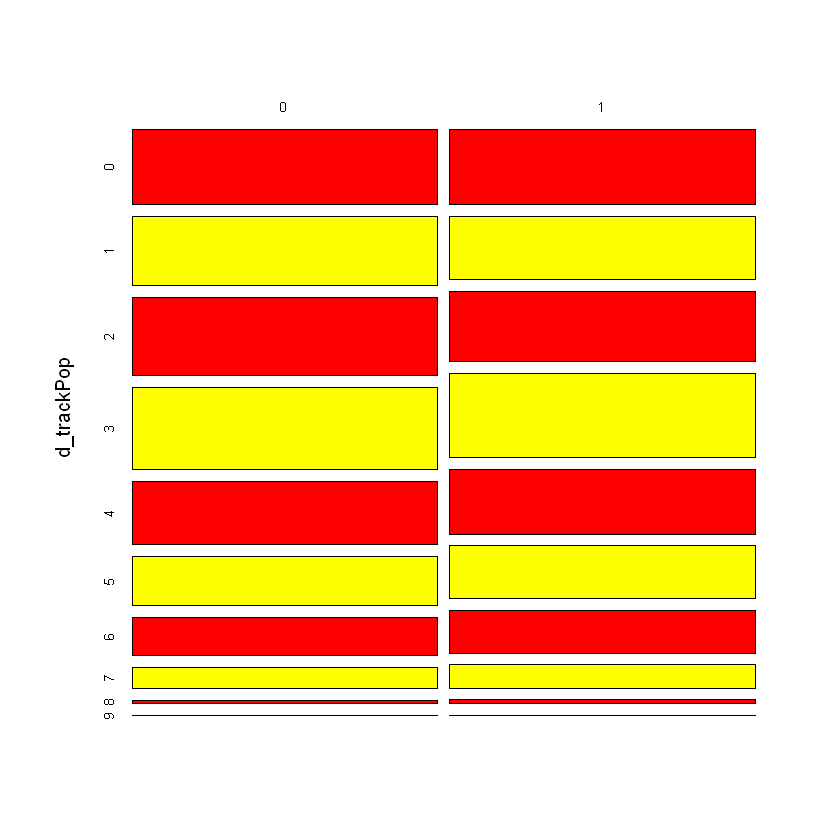

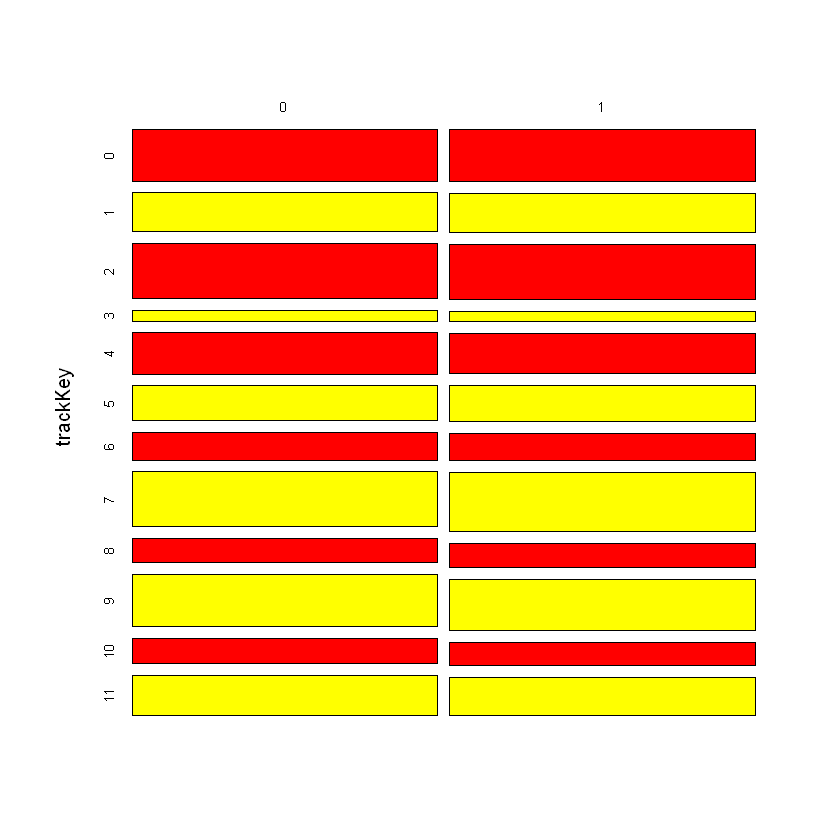

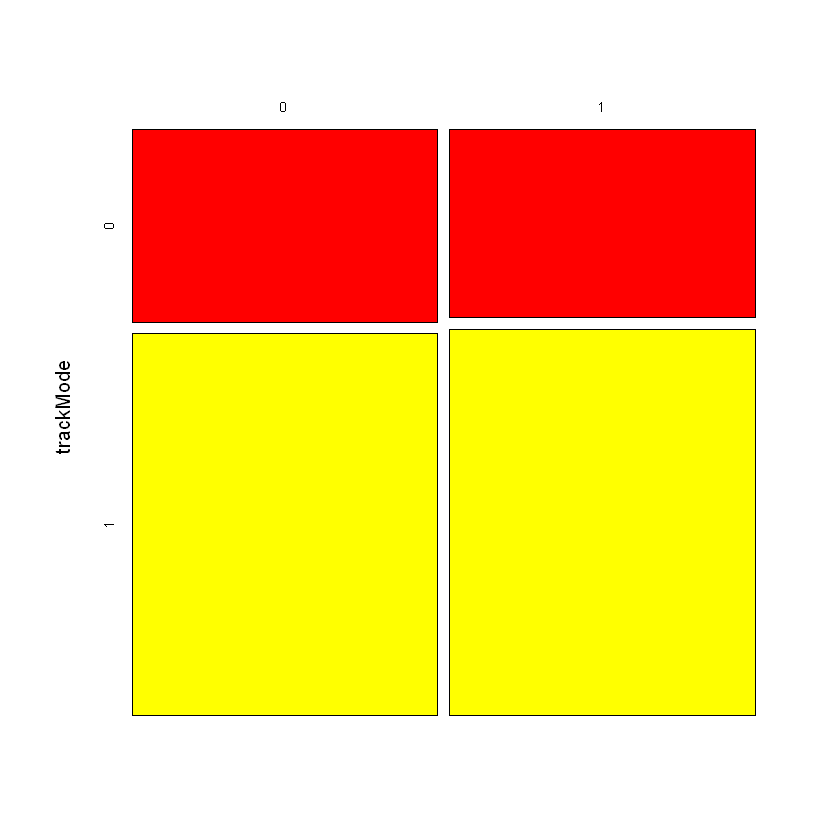

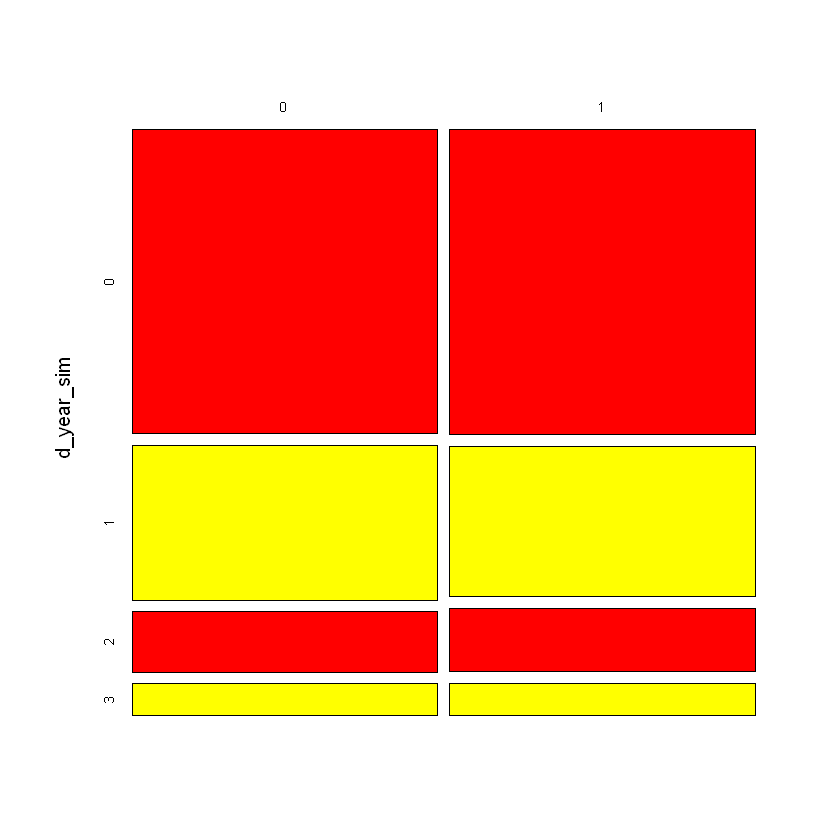

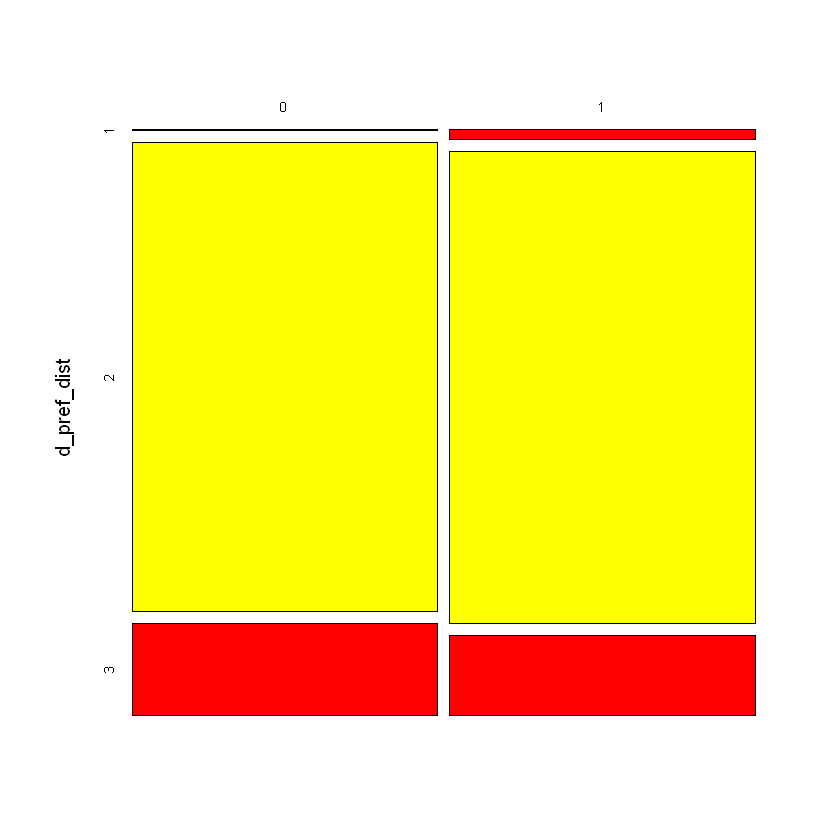

In [19]:
plot(NBmodel)

In [20]:
NBpred <- predict(NBmodel, df_test, type="prob")
head(round(NBpred))

Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."


0,1
1,0
0,1
1,0
0,1
0,1
1,0


In [21]:
NBpred <- predict(NBmodel, df_test, type="class")
NBpred

Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."


[1] 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0
   [37] 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1
   [73] 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0
  [109] 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0
  [145] 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0
  [181] 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0
  [217] 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0
  [253] 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0
  [289] 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0
  [325] 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1
  [361] 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0
  [397] 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1
  [433] 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
  [469] 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0
  [505] 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0
  [541] 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0
  [577] 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1
  [613] 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1
  [649] 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0
  [685] 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0
  [721] 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0
  [757] 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0
  [793] 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1
  [829] 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0
  [865] 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0
  [901] 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1
  [937] 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0
  [973] 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1
 [1009] 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1
 [1045] 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 [1081] 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0
 [1117] 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 [1153] 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1
 [1189] 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1
 [1225] 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0
 [1261] 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0
 [1297] 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0
 [1333] 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 [1369] 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1
 [1405] 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1
 [1441] 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 [1477] 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0
 [1513] 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 [1549] 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0
 [1585] 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1
 [1621] 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 [1657] 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0
 [1693] 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1
 [1729] 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0
 [1765] 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0
 [18

In [22]:
pred_table <- table(NBpred, df_test$Preferred)
pred_table

      
NBpred     0     1
     0 52831 47897
     1 43681 48785

In [23]:
sum(diag(pred_table)/sum(pred_table))

[1] 0.5259791